In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing and reading the data

In [4]:
train = pd.read_csv('./train_LZdllcl.csv')
test = pd.read_csv('./test_2umaH9m.csv')
train.head()
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.dtypes
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

No inconsistency in data formats there.

In [6]:
train.count()
test.count()

employee_id             54808
department              54808
region                  54808
education               52399
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    50684
length_of_service       54808
KPIs_met >80%           54808
awards_won?             54808
avg_training_score      54808
is_promoted             54808
dtype: int64

employee_id             23490
department              23490
region                  23490
education               22456
gender                  23490
recruitment_channel     23490
no_of_trainings         23490
age                     23490
previous_year_rating    21678
length_of_service       23490
KPIs_met >80%           23490
awards_won?             23490
avg_training_score      23490
dtype: int64

*education* and *previous_year_rating* are missing some values.

In [7]:
train['index'] = train.index
test['index'] = test.index #For later combining purposes

In [8]:
total = train.append(test, ignore_index = True)
total.count()
total.sample(10)

d:\desk\ml\mlenv64\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


KPIs_met >80%           78298
age                     78298
avg_training_score      78298
awards_won?             78298
department              78298
education               74855
employee_id             78298
gender                  78298
index                   78298
is_promoted             54808
length_of_service       78298
no_of_trainings         78298
previous_year_rating    72362
recruitment_channel     78298
region                  78298
dtype: int64

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,index,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region
6865,0,33,50,0,Sales & Marketing,Master's & above,6071,m,6865,0.0,8,2,1.0,other,region_31
31857,1,31,57,0,Finance,Bachelor's,34699,m,31857,1.0,7,1,3.0,other,region_8
30420,0,46,78,0,Technology,Master's & above,23950,m,30420,0.0,18,1,2.0,other,region_20
52609,0,28,47,0,Sales & Marketing,Bachelor's,39999,m,52609,0.0,4,1,2.0,sourcing,region_27
70893,0,37,72,0,Procurement,Master's & above,53437,m,16085,NaN,9,1,2.0,sourcing,region_29
50943,0,31,46,0,Sales & Marketing,Bachelor's,56758,m,50943,0.0,6,1,3.0,sourcing,region_27
22403,1,37,55,0,Operations,Bachelor's,7636,m,22403,1.0,9,1,3.0,other,region_15
26834,1,26,47,0,HR,Bachelor's,59874,f,26834,0.0,3,1,4.0,sourcing,region_11
15700,1,28,62,0,Operations,Bachelor's,5623,m,15700,0.0,1,1,NaN,sourcing,region_6
33922,0,47,65,0,Operations,Bachelor's,39939,m,33922,0.0,6,1,3.0,sourcing,region_5


With the total data, Let's first move on to visualising and then removing the missing value columns.

# Visualisation and removing missing values

In [9]:
#total.previous_year_rating = total.previous_year_rating.fillna(0)
total.education = total.education.fillna('Unknown')

In [10]:
total.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'index',
       'is_promoted', 'length_of_service', 'no_of_trainings',
       'previous_year_rating', 'recruitment_channel', 'region'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

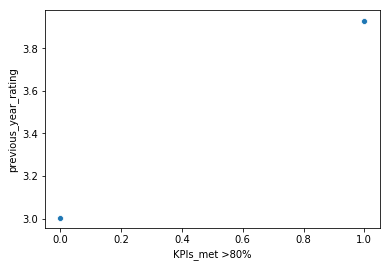

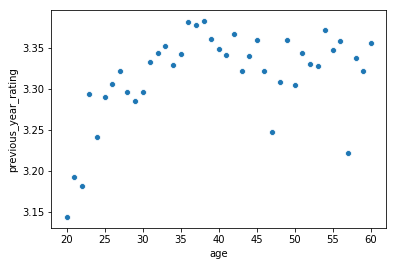

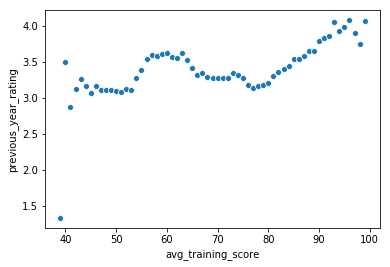

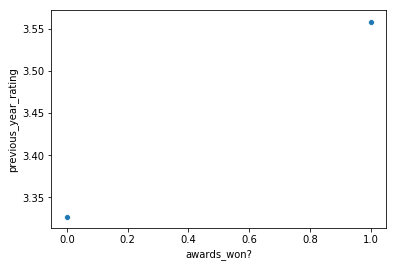

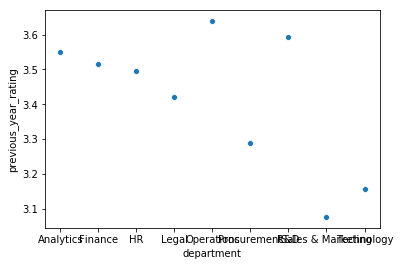

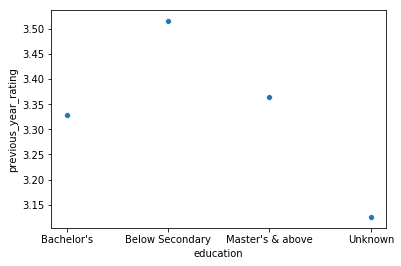

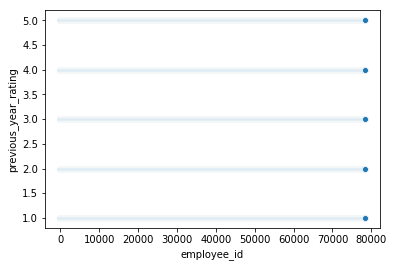

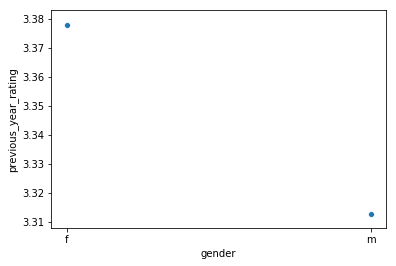

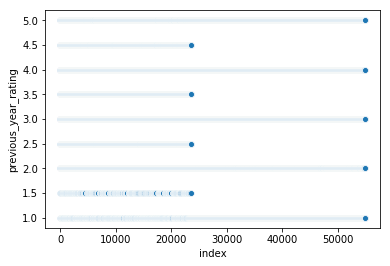

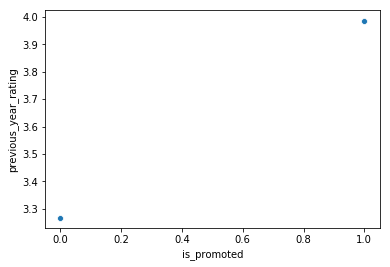

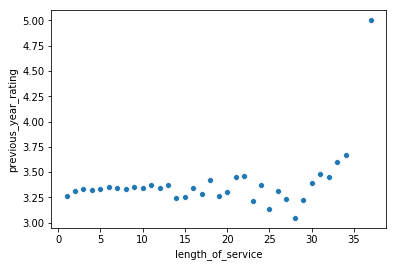

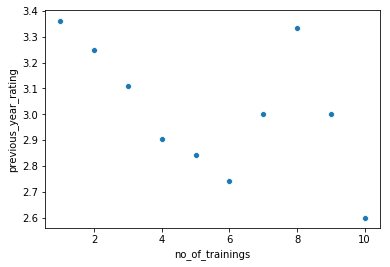

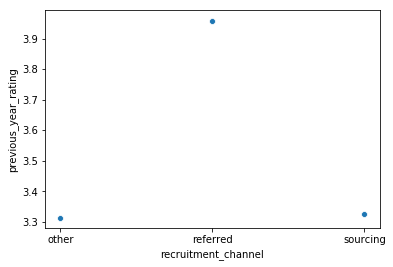

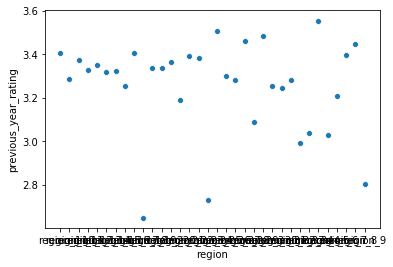

In [11]:
for x in ['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'index',
       'is_promoted', 'length_of_service', 'no_of_trainings',
        'recruitment_channel', 'region']:
    gr = total.groupby(x).mean()
    plt.figure()
    sns.scatterplot(x=gr.index, y=gr.previous_year_rating)

In [12]:
features_list = ['KPIs_met >80%', 'avg_training_score']

In [13]:
#predicting previous year rating

total_pyr = total.copy()
total_pyr.dropna(inplace=True)
total_pyr['avg_training_score_grouped'] = pd.cut(total_pyr.avg_training_score, bins=[0, 50, 80, 105], labels=[1, 2, 3])


In [14]:
total_pyr = pd.get_dummies(data=total_pyr, columns=['avg_training_score_grouped','recruitment_channel'])

In [15]:
total_pyr.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'index',
       'is_promoted', 'length_of_service', 'no_of_trainings',
       'previous_year_rating', 'region', 'avg_training_score_grouped_1',
       'avg_training_score_grouped_2', 'avg_training_score_grouped_3',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(total_pyr[features_list], total_pyr['previous_year_rating'])
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.318285849577776

Since we can't predict previous_year_rating in any way, we'll impute them with the mean of the ratings.

In [17]:
total.previous_year_rating.fillna(total.previous_year_rating.mean(), inplace=True)

In [18]:
gr = total.groupby('avg_training_score').mean()
gr

,KPIs_met >80%,age,awards_won?,employee_id,index,is_promoted,length_of_service,no_of_trainings,previous_year_rating
avg_training_score,,,,,,,,,
39,0.000000,34.333333,0.000000,34150.000000,5775.666667,0.000000,8.666667,1.333333,1.333333
40,0.375000,36.125000,0.000000,27539.875000,13568.875000,0.000000,6.750000,1.500000,3.458055
41,0.324324,33.810811,0.000000,41121.945946,27337.918919,0.038462,4.594595,1.459459,2.936786
42,0.179487,33.897436,0.012821,41141.064103,25452.615385,0.032258,6.038462,1.384615,3.149458
43,0.286885,34.233607,0.012295,38109.663934,23812.745902,0.039773,5.676230,1.241803,3.264936
44,0.270161,34.883065,0.016129,39307.737903,21761.147177,0.029851,6.014113,1.199597,3.178685
45,0.275551,34.771543,0.020040,38569.574148,22681.148297,0.045521,5.853707,1.283567,3.088745
46,0.261876,35.100487,0.017052,39047.797199,22507.911084,0.031690,6.159562,1.252741,3.173900
47,0.290959,34.553889,0.015397,39414.793525,22397.193447,0.045246,5.764706,1.253060,3.126770


In [19]:
from scipy.stats import chisquare

Text(0.5,1,'region')

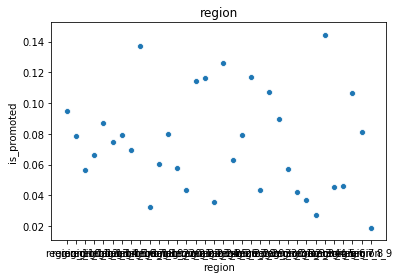

In [304]:
sns.scatterplot(x=group.index, y=group.is_promoted)
plt.title('region')

Text(0.5,1,'age')

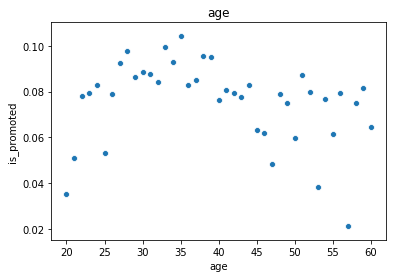

In [310]:
sns.scatterplot(x=group.index, y=group.is_promoted)
plt.title('age')

Text(0.5,1,'previous_year_rating')

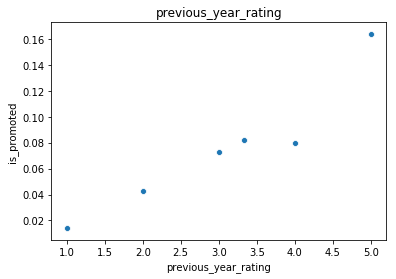

In [56]:
sns.scatterplot(x=group.index, y=group.is_promoted)
plt.title('previous_year_rating')

Text(0.5,1,'length_of_service')

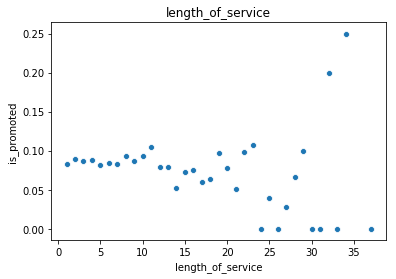

In [324]:
sns.scatterplot(x=group.index, y=group.is_promoted)
plt.title('length_of_service')

In [25]:
group = total.groupby(['department','KPIs_met >80%']).mean()
group

age  avg_training_score  awards_won?  \
department        KPIs_met >80%                                               
Analytics         0              32.567928           84.525924     0.012689   
                  1              32.172258           84.670323     0.043226   
Finance           0              32.680672           60.315126     0.014472   
                  1              31.464646           60.161616     0.038384   
HR                0              34.825130           50.002159     0.007772   
                  1              33.441449           50.312553     0.041281   
Legal             0              34.286294           59.835533     0.010152   
                  1              32.895792           59.671343     0.044088   
Operations        0              36.092446           60.299297     0.013944   
                  1              36.074101           60.182610     0.034837   
Procurement       0              36.029416           70.133797     0.013285   
                  1              35.868318           70.122295     0.042243   
R&D               0              32.692400           84.529554     0.008444   
                  1              33.031148           84.555738     0.039344   
Sales & Marketing 0              34.913917           49.954949     0.010470   
                  1              34.495683           50.899167     0.050725   
Technology        0              35.219894           79.872042     0.012359   
                  1              34.259533           79.977234     0.051793   

                                  employee_id         index  is_promoted  \
department        KPIs_met >80%                                            
Analytics         0              39445.965434  22789.311967     0.049232   
                  1              38533.986452  22331.120000     0.164124   
Finance           0              40109.045285  22571.762838     0.051213   
                  1              39822.572391  23217.795286     0.123574   
HR                0              40202.683074  22470.957686     0.025466   
                  1              39313.392586  21919.887953     0.117574   
Legal             0              37520.428426  22449.433503     0.020231   
                  1              38842.436874  21234.326653     0.112392   
Operations        0              39310.150527  22893.293259     0.050310   
                  1              38815.680040  22948.158909     0.142799   
Procurement       0              38991.541673  22760.490906     0.042314   
                  1              39304.504042  22739.370013     0.185529   
R&D               0              38124.165259  22461.407720     0.032590   
                  1              39362.867213  21992.785246     0.120192   
Sales & Marketing 0              38968.900730  22866.696078     0.028523   
                  1              39777.701511  22401.144157     0.192652   
Technology        0              39032.595931  22587.006179     0.049786   
                  1              38726.460159  22546.401252     0.217657   

                                 length_of_service  no_of_trainings  \
department        KPIs_met >80%                                       
Analytics         0                       5.103478         1.333844   
                  1                       4.699032         1.351613   
Finance           0                       5.179272         1.324930   
                  1                       4.437037         1.280808   
HR                0                       6.000000         1.068221   
                  1                       5.014322         1.036226   
Legal             0                       4.805076         1.083249   
                  1                       4.196393         1.090180   
Operations        0                       6.627251         1.148221   
                  1                       6.140491         1.186608   
Procurement       0                       6.559386         1.383362   
              

In [289]:
from pandas.plotting import scatter_matrix

Let's one hot encode the categorical variables. The necessary ones.

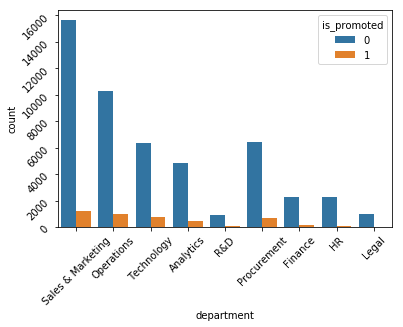

In [245]:
sns.countplot(data=train, x='department', hue='is_promoted')
plt.tick_params(labelrotation=45)

So, we can simply one hot encode this column for now.

In [246]:
total = pd.get_dummies(data=total, columns=['department'])

In [247]:
total.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,education,employee_id,gender,index,is_promoted,length_of_service,...,region,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,1,35,49,0,Master's & above,65438,f,0,0.0,8,...,region_7,0,0,0,0,0,0,0,1,0
1,0,30,60,0,Bachelor's,65141,m,1,0.0,4,...,region_22,0,0,0,0,1,0,0,0,0
2,0,34,50,0,Bachelor's,7513,m,2,0.0,7,...,region_19,0,0,0,0,0,0,0,1,0
3,0,39,50,0,Bachelor's,2542,m,3,0.0,10,...,region_23,0,0,0,0,0,0,0,1,0
4,0,45,73,0,Bachelor's,48945,m,4,0.0,2,...,region_26,0,0,0,0,0,0,0,0,1


In [248]:
# Gender key: 0 = male, 1 = female
total['gender'] = total['gender'].replace({'m':0, 'f':1})


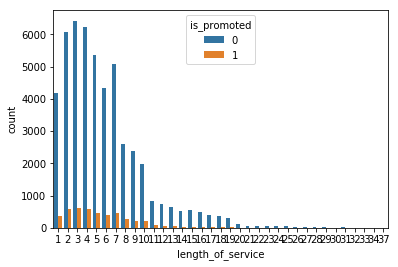

In [249]:
sns.countplot(data=train, x='length_of_service', hue='is_promoted')

Can, or cannot be a feature. Will have to experiment further. However, we can create a binned column for further study.

In [250]:
total['length_of_service_grouped'] = pd.cut(total.length_of_service, bins=[0, 7, 10, 40],labels=[1, 2, 3])

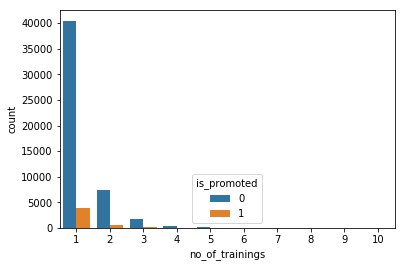

In [251]:
sns.countplot(data=train, x='no_of_trainings', hue='is_promoted')

Can't decide. Bin it and keep it for further experimentation.

In [252]:
total['no_of_trainings_grouped'] = pd.cut(total.no_of_trainings, bins=[0,2,11], labels=[1, 2])

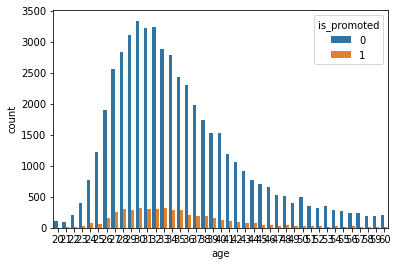

In [253]:
sns.countplot(data=train, x='age',hue='is_promoted')

Could bin it later, currently keeping it as a continuous feature.

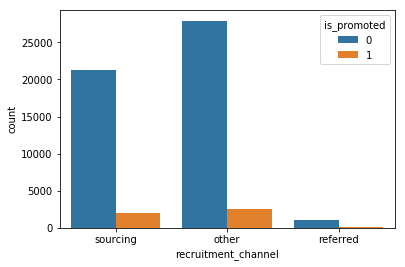

In [254]:
sns.countplot(data=train, x='recruitment_channel',hue='is_promoted')

In [255]:
total = pd.get_dummies(data=total, columns=['recruitment_channel'])

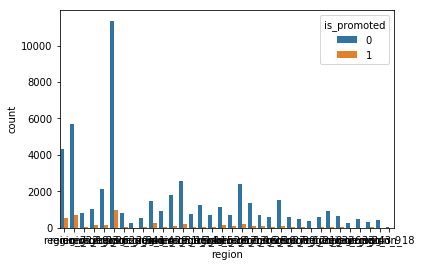

In [256]:
sns.countplot(data=train, x='region',hue='is_promoted')

We leave region for now. Untouched.

Let's focus on the missing values columns now.

In [257]:
total.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

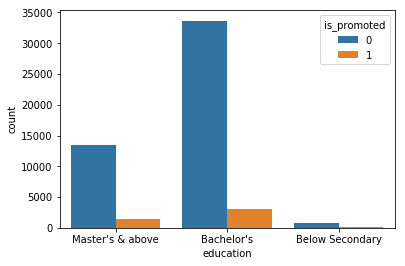

In [258]:
sns.countplot(data=train, x='education',hue='is_promoted')

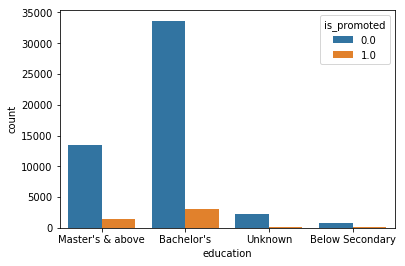

In [261]:
sns.countplot(data=total, x='education', hue='is_promoted')

We are now rid of all NaN values.

In [262]:
total = pd.get_dummies(data=total, columns=['education'])

In [263]:
total = pd.get_dummies(data=total, columns=['region'])

In [264]:
total.count()

KPIs_met >80%                   78298
age                             78298
avg_training_score              78298
awards_won?                     78298
employee_id                     78298
gender                          78298
index                           78298
is_promoted                     54808
length_of_service               78298
no_of_trainings                 78298
previous_year_rating            78298
department_Analytics            78298
department_Finance              78298
department_HR                   78298
department_Legal                78298
department_Operations           78298
department_Procurement          78298
department_R&D                  78298
department_Sales & Marketing    78298
department_Technology           78298
length_of_service_grouped       78298
no_of_trainings_grouped         78298
recruitment_channel_other       78298
recruitment_channel_referred    78298
recruitment_channel_sourcing    78298
education_Bachelor's            78298
education_Be

# Feature engineering, if we can

In [57]:
total.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'index',
       'is_promoted', 'length_of_service', 'no_of_trainings',
       'previous_year_rating', 'recruitment_channel', 'region'],
      dtype='object')

In [29]:
total['avg_training_score_grouped'] = pd.cut(total.avg_training_score, bins=[0,90,101], labels=[0,1])

In [30]:
total.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,index,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,avg_training_score_grouped
0,1,35,49,0,Sales & Marketing,Master's & above,65438,f,0,0.0,8,1,5.0,sourcing,region_7,0
1,0,30,60,0,Operations,Bachelor's,65141,m,1,0.0,4,1,5.0,other,region_22,0
2,0,34,50,0,Sales & Marketing,Bachelor's,7513,m,2,0.0,7,1,3.0,sourcing,region_19,0
3,0,39,50,0,Sales & Marketing,Bachelor's,2542,m,3,0.0,10,2,1.0,other,region_23,0
4,0,45,73,0,Technology,Bachelor's,48945,m,4,0.0,2,1,3.0,other,region_26,0


In [31]:
total['length_of_service_grouped'] = pd.cut(total.length_of_service, bins=[0,20,200], labels=[0,1])

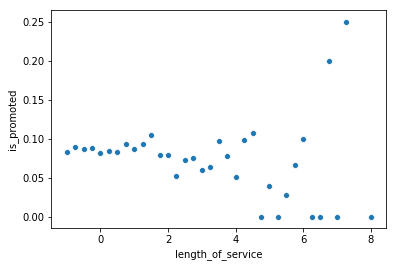

In [21]:
group = total.groupby('length_of_service').mean()
sns.scatterplot(x=group.index, y=group.is_promoted)

In [52]:
total.gender.replace({'m':0,'f':1},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

# Scaling and Training the model

In [171]:
total._get_numeric_data().columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'employee_id', 'gender', 'index', 'is_promoted', 'length_of_service',
       'no_of_trainings', 'previous_year_rating', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24'

In [172]:
#Scaling does not seem to be required

In [53]:
total.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'index',
       'is_promoted', 'length_of_service', 'no_of_trainings',
       'previous_year_rating', 'recruitment_channel', 'region',
       'avg_training_score_grouped', 'length_of_service_grouped'],
      dtype='object')

In [66]:
total['KPIs_met >80%'] = total['KPIs_met >80%'].astype(str)
total['awards_won?'] = total['awards_won?'].astype(str)
total['gender'] = total['gender'].astype(str)

In [67]:
MODEL_FEATURES = ['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'employee_id', 'gender', 'index', 'is_promoted', 'length_of_service',
       'no_of_trainings', 'previous_year_rating', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', "education_Bachelor's",
       "education_Below Secondary", "education_Master's & above"] 

In [68]:
train_dat = total[total.index < 54808]
train_dat.shape

(54808, 17)

In [69]:
test_dat = total[total.index >= 54808]

In [70]:
train_dat[MODEL_FEATURES].dtypes
test_dat[MODEL_FEATURES].head()

KPIs_met >80%                   object
awards_won?                     object
gender                          object
no_of_trainings                  int64
previous_year_rating           float64
avg_training_score_grouped    category
length_of_service_grouped     category
dtype: object

,KPIs_met >80%,awards_won?,gender,no_of_trainings,previous_year_rating,avg_training_score_grouped,length_of_service_grouped
54808,1,0,0,1,3.332219,0,0
54809,0,0,1,1,3.000000,0,0
54810,0,0,0,1,1.000000,0,0
54811,0,0,1,3,2.000000,0,0
54812,0,0,0,1,4.000000,0,0


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train_dat[MODEL_FEATURES], train_dat['is_promoted'])

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [74]:
clf = GradientBoostingClassifier()

In [75]:
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, preds)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

0.22222222222222224